In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

def filtered_data(path):
    data_all = np.loadtxt(path)
    mask = np.in1d(data_all[:, 0], (2, 3))
    data_x = data_all[mask, 1: ]
    data_y = data_all[mask, 0]
    return data_x, data_y

train_x, train_y = filtered_data('/content/drive/MyDrive/Datasets/zip.train')
test_x, test_y = filtered_data('/content/drive/MyDrive/Datasets/zip.test')

k_points = [1, 3, 5, 7, 15]

In [4]:
from pandas import read_csv

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(train_x, train_y)
# make predictions
yhat = model.predict(test_x)
# evaluate predictions
mae = mean_absolute_error(test_y, yhat)
print('MAE: %.3f' % mae)
print('Median absolute error: ', median_absolute_error(test_y, yhat))
print('Intercept:', model.intercept_)

print('Top accuracy score: ', top_k_accuracy_score(test_y, yhat, k = 1))

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("MSE: %.2f" % mean_squared_error(test_y, yhat))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_y, yhat))


MAE: 0.191
Median absolute error:  0.1381695172438846
Intercept: 23.585842485148817
Top accuracy score:  0.45604395604395603
Coefficients: 
 [-2.88861437e-01  5.93022626e-02  2.40565969e-02 -2.64356805e-02
  1.16775415e-02  3.74923660e-03 -3.79483192e-03 -3.58438231e-03
 -1.36610358e-02  2.42559422e-02 -5.71717440e-02  7.69621164e-02
 -9.82394663e-03  1.73586415e-01 -2.10862950e-01  2.12482973e+01
 -5.65358597e-02 -5.52421959e-02  9.90591256e-03 -3.08468051e-03
  3.68977893e-03 -1.20769789e-02  5.07032401e-02 -3.08258960e-02
 -1.08705270e-02 -1.53272874e-04  4.24856619e-02  3.74454934e-02
 -2.43014712e-02 -7.05475222e-03 -3.00281362e-01  8.52516002e-01
 -1.07893201e-02 -2.29830021e-02  2.88215942e-02  1.02645629e-02
 -4.10299809e-02  8.16360126e-03  1.56134600e-03 -2.09752763e-03
  1.84995187e-02  4.56621375e-03  1.44598363e-03 -2.67258325e-02
 -1.84425240e-02 -4.64405386e-02  8.35415899e-02  7.16212523e-02
 -1.41997042e-02 -2.60343856e-02  1.75116661e-02 -1.89609324e-02
  1.51404964e-

In [7]:
from math import sqrt

rmse_val = [] #to store rmse values for different k
rmse_valtrain = []
for K in k_points:
    model = LinearRegression()

    model.fit(train_x, train_y)  #fit the model
    pred_train=model.predict(train_x) #make prediction on train set
    pred=model.predict(test_x) #make prediction on test set
    error_train = sqrt(mean_squared_error(train_y,pred_train)) #calculate rmse
    error = sqrt(mean_squared_error(test_y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    rmse_valtrain.append(error_train)
    print('RMSE value for train set k = ', K, 'is:', error_train)
    print('RMSE value fortest set k= ' , K , 'is:', error)
    print('\n')


RMSE value for train set k =  1 is: 0.15751736903818547
RMSE value fortest set k=  1 is: 0.38944235095282775


RMSE value for train set k =  3 is: 0.15751736903818547
RMSE value fortest set k=  3 is: 0.38944235095282775


RMSE value for train set k =  5 is: 0.15751736903818547
RMSE value fortest set k=  5 is: 0.38944235095282775


RMSE value for train set k =  7 is: 0.15751736903818547
RMSE value fortest set k=  7 is: 0.38944235095282775


RMSE value for train set k =  15 is: 0.15751736903818547
RMSE value fortest set k=  15 is: 0.38944235095282775




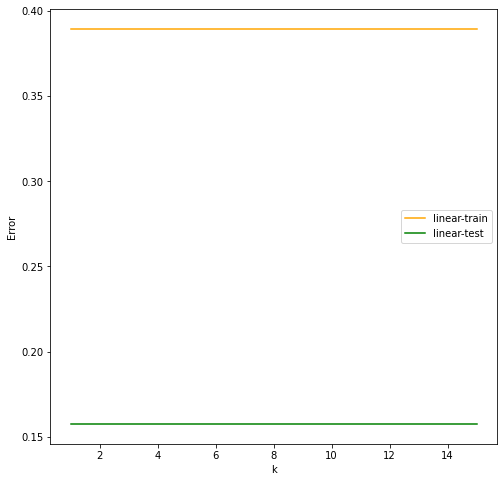

In [8]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1, 1, 1)


axes.plot(k_points, rmse_val, '-', color = 'orange', label = 'linear-train')
axes.plot(k_points, rmse_valtrain, '-', color = 'green', label = 'linear-test')

axes.legend()
axes.set_xlabel("k")
axes.set_ylabel("Error")
plt.show()


In [9]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

rmse_val = [] #to store rmse values for different k
rmse_valtrain = []
for K in k_points:
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_x, train_y)  #fit the model
    pred_train=model.predict(train_x) #make prediction on train set
    pred=model.predict(test_x) #make prediction on test set
    error_train = sqrt(mean_squared_error(train_y,pred_train)) #calculate rmse
    error = sqrt(mean_squared_error(test_y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    rmse_valtrain.append(error_train)
    print('RMSE value for train set k = ', K, 'is:', error_train)
    print('RMSE value fortest set k= ' , K , 'is:', error)
    print('\n')

RMSE value for train set k =  1 is: 0.0
RMSE value fortest set k=  1 is: 0.15724272550828775


RMSE value for train set k =  3 is: 0.05932721485563096
RMSE value fortest set k=  3 is: 0.1513068831672006


RMSE value for train set k =  5 is: 0.06787953586677535
RMSE value fortest set k=  5 is: 0.15118578920369088


RMSE value for train set k =  7 is: 0.07333163697446661
RMSE value fortest set k=  7 is: 0.1534531872941642


RMSE value for train set k =  15 is: 0.0913155677711452
RMSE value fortest set k=  15 is: 0.16374732612530443




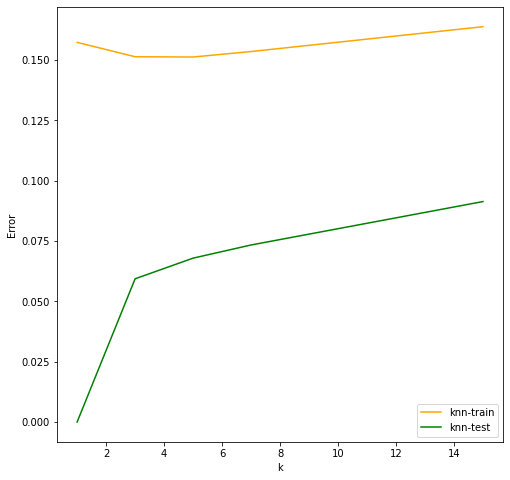

In [10]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1, 1, 1)


axes.plot(k_points, rmse_val, '-', color = 'orange', label = 'knn-train')
axes.plot(k_points, rmse_valtrain, '-', color = 'green', label = 'knn-test')

axes.legend()
axes.set_xlabel("k")
axes.set_ylabel("Error")
plt.show()